# LAB 6
## PI calculation

Importing libraries

In [1]:
import math
import random
import matplotlib.pyplot as plt
import time
from decimal import Decimal

Defining 3 algorithms for calculating pi


In [2]:
def bbp_formula(n):
    pi = Decimal(0)
    k = 0
    while k < n:
        pi += (Decimal(1)/(16**k))*((Decimal(4)/(8*k+1))-(Decimal(2)/(8*k+4))-(Decimal(1)/(8*k+5))-(Decimal(1)/(8*k+6)))
        k += 1
    return pi

def chudnovsky_algorithm(n):
    pi = Decimal(0)
    k = 0
    while k < n:
        pi += Decimal(Decimal(-1)**k)*Decimal(Decimal(math.factorial(6*k))/Decimal((math.factorial(k)**3)*Decimal(math.factorial(3*k)))*(Decimal(13591409+545140134*k)/(Decimal(640320)**(3*k))))
        k += 1
    pi = pi * Decimal(10005).sqrt()/Decimal(4270934400)
    pi = pi**(-1)
    return pi

def monte_carlo_method(n):
    inside = 0
    total = n ** 2
    for i in range(total):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside += 1
    pi = 4*(inside/total)
    return pi

def measure_execution_time(func, *args):
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    execution_time = end_time - start_time
    return result, execution_time

def plot_execution_time(algorithm, label, n_list, plot=True, return_pi=False):
    pi = []
    pi_time = []
    for n in n_list:
        pi_alg, time_alg = measure_execution_time(algorithm, n)
        pi.append(pi_alg)
        pi_time.append(time_alg)
    if plot:
        # plot the execution time
        plt.plot(n_list, pi_time, label=label)
        plt.xlabel('Number of iterations')
        plt.ylabel('Execution time (s)')
        plt.title(f'Execution time of the {label} formula')
        plt.legend()
        plt.show()
    if return_pi:
        return pi_time

In [3]:
# List of number of iterations
n_list = [10, 50, 100, 200, 300, 500, 800, 1000, 1200, 1500]

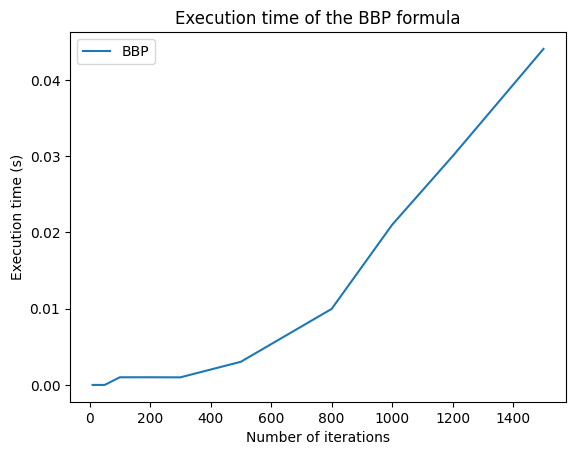

In [4]:
plot_execution_time(bbp_formula, 'BBP', n_list)

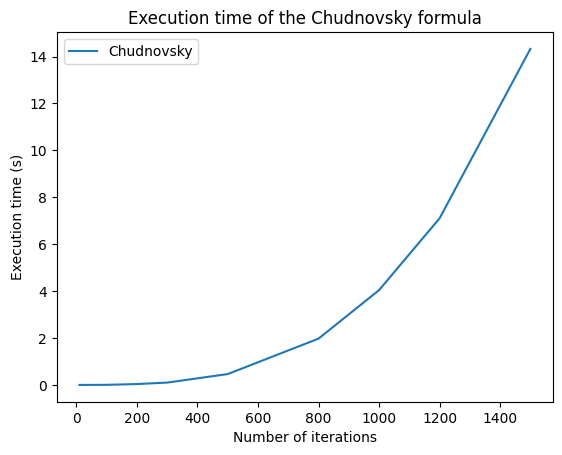

In [5]:
plot_execution_time(chudnovsky_algorithm, 'Chudnovsky', n_list)

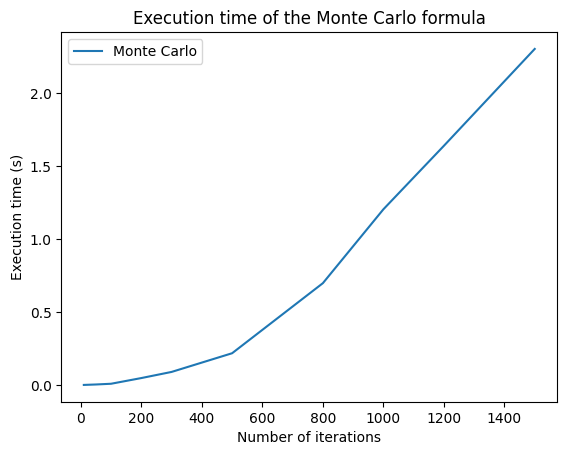

In [6]:
plot_execution_time(monte_carlo_method, 'Monte Carlo', n_list)

In [7]:
bbp_time = plot_execution_time(bbp_formula, 'BBP', n_list, plot=False, return_pi=True)
chud_time = plot_execution_time(chudnovsky_algorithm, 'Chudnovsky', n_list, plot=False, return_pi=True)
mc_time = plot_execution_time(monte_carlo_method, 'Monte Carlo', n_list, plot=False, return_pi=True)

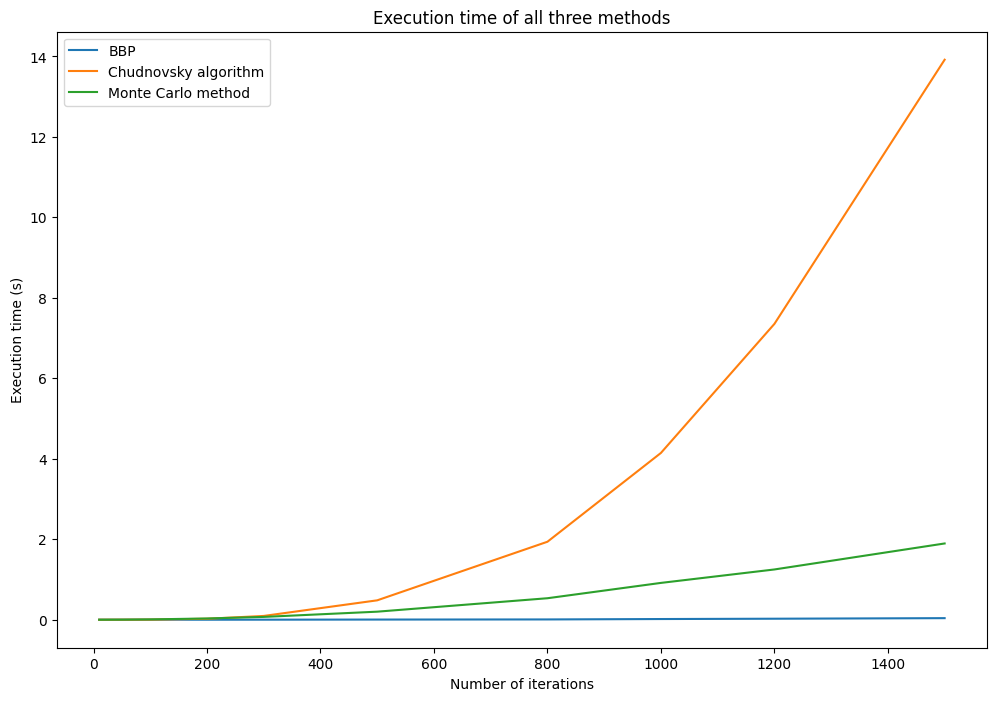

In [8]:
# set figure size
plt.figure(figsize=(12, 8))
plt.plot(n_list, bbp_time, label='BBP')
plt.plot(n_list, chud_time, label='Chudnovsky algorithm')
plt.plot(n_list, mc_time, label='Monte Carlo method')
plt.xlabel('Number of iterations')
plt.ylabel('Execution time (s)')
plt.title('Execution time of all three methods')
plt.legend()
plt.show()

Best algorithm is BBP. Worst algorithm performance is Chudnovsky. 
Monte Carlo performed worse than BBP but better than Chudnovsky algorithm.